# Entropy, Information Gain, Mutual Information

Outline:
1. What is Surprise / Information + some examples
2. Entropy and how it connects with Surprise / Information
3. Information Gain, how it's used in decision tree classification
4. Mutual Information
5. Measures of divergence between two probability distributions: Kullback-Leibler (Relative entropy) and Jensen-Shannon
6. Calculating Mutual Information using KL Divergence, proof it yields the same result with using Entropy
7. An example for Mutual Information

Summary:
- Surprise is the logged inverse of probability. Also called Information, knowing about rarer events has more value compared to knowing about more common events
- Entropy is the expected value of surprise
- Entropy is a measure of heterogeneity
    - Thus reducing entropy is important in Decision Trees to have a classifier **that aims to completely separate** class A from class B
- Information gain is the expected reduction in entropy after a change in the dataset. For decision tree classification, the "change" is splitting the dataset into subsets
- Divergence measures can be also used for evaluating how good a distribution approximates another distribution
- Mutual information is the information a random variable conveys about the other. In other words, mutual dependence
    - It can be calculated using the KL Divergence of the joint distribution and the product of the marginals as well

Sources and additional reading:  
Josh Starmer - StatQuest for the definition of entropy  
[Shannon's Information Theory Paper](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf)  
Jason Browlee - Machine Learning Mastery for information gain  
[Dr. Yao Xie - Entropy and Mutual Information](https://www2.isye.gatech.edu/~yxie77/ece587/Lecture2.pdf)

---

## What is "surprise"?

Say we have three patios A, B, C containing blue and orange chickens. Numbers are:  
A: 6 Orange, 1 Blue  
B: 1 Orange, 10 Blue  
C: 7 Orange, 7 Blue

Picking an orange chicken from A wouldn't be a surprise. Picking a blue chicken from A would be relatively surprising.  
For C, both are equally likely, so choosing either would not be surprising.

**Surprise is somewhat the inverse of probability**

It is also called Shannon Information / Self-Information /  Information. Intuition behind the Information Theory says, **learning a rare event is more informative than learning a common event.** Rare events are more uncertain / more surprising, so they require more information to represent them than common events.  

Given there's a one-in-a-million chance of your friend Tina winning the lottery, knowing that Tina won the lottery is definitely more informative than knowing that Tina lost the lottery. 

### Calculating Surprise

We said surprise is the inverse of probability, so can we say `Surprise = 1 / Probability`?  **No.**  
Imagine a coin flip experiment resulting in Heads every time, `Surprise(Heads) = 1 / P(Heads) = 1` doesn't make sense. We would expect it to be 0.

What about **`Surprise = log_b(1 / Probability)`**, where b = 2 if we measure entropy in bits?  
This makes `Surprise(Heads) = 0`, and `Surprise(Tails) = Undefined` for the experiment above. "Undefined" for Tails is OK, because it's the surprise of something that never happens

### Example: One coin toss

Given P(Heads) = 0.9 and P(Tails) = 0.1, calculating surprise for both:

`Surprise(Heads) = log2(1 / P(Heads)) = 0.15`  
`Surprise(Tails) = log2(1 / P(Tails)) = 3.32`

### Example: Sequence of coin tosses

Given the probabilities above, calculate the surprise for a HHT outcome:

`Surprise(HHT) = log2(1 / (P(Heads) * P(Heads) * P(Tails))) = - (log2(P(Heads)) + log2(P(Heads)) + log2(P(Tails)))`  
` = 3.62`

Observe that the **surprise of the sequence is the sum of the surprises for each individual experiment**

---

## How Surprise connects to Entropy

If we wanted to calculate the entire surprise of the coin, we would do `Surprise(Heads) * P(Heads) + Surprise(Tails) * P(Tails)`   
The "entire surprise of the coin" is Entropy, **Entropy is the expected value of surprise.**

Thus Entropy = `-sum(P(x) * log2(P(x)) for x € X)`. Notice how the log2 of inverse-probability is simplified.

### Example: Patios A, B, C

The entropies are respectively 0.59, 0.44, 1.0.  
`Entropy = P(Orange) * Surprise(Orange) + P(Blue) * Surprise(Blue)`  
`Entropy(A) = (0.86 * 0.22 + 0.14 * 2.80)`  
`Entropy(B) = (0.09 * 3.46 + 0.91 * 0.14)`  
`Entropy(C) = (0.50 * 1.00 + 0.50 * 1.00)`

**Interpreting the results:**

Entropy(A) < Entropy(B): B has a lower probability for the more surprising outcome  
Entropy(C) = 1: Even the surprise values are relatively moderate, high probability for both made the entropy 1.  
**Entropy increases when heterogeneity increases**

### Joint Entropy

Nothing new, calculated from the definition:  
`H(X, Y) = -sum(P(x, y) * log2(P(x, y)) for x € X, y € Y)`

### Conditional Entropy

Entropy of a rv given another rv.

If `(X, Y) ~ P(x, y)` then    
`H(Y | X) = sum(P(x, y) * log2(P(x) / P(x, y)) for x € X, y € Y)`

Proof:  
`H(Y | X) = sum(P(x) * H(Y | X = x) for x € X)`  
`H(Y | X) = -sum(P(x) * sum(P(y | x) * log2(P(y | x)) for y € Y) for x € X)`  
`H(Y | X) = -sum(P(x, y) * log2(P(y | x)) for x € X, y € Y)` by Chain rule  
`H(Y | X) = -sum(P(x, y) * log2(P(x, y) / P(x)) for x € X, y € Y)`  
`H(Y | X) = sum(P(x, y) * log2(P(x) / P(x, y)) for x € X, y € Y)`

### Chain Rule for Entropy

Entropy of a pair of rvs: Entropy of one + conditional entropy of the other:  
`H(Y | X) = H(X, Y) - H(X)`  
`H(X | Y) = H(X, Y) - H(Y)`

Proof:  
`H(Y | X) = -sum(P(x, y) * log2(P(x, y))) + -sum(P(x) * log2(1 / P(x))`  
`H(Y | X) = -sum(P(x, y) * log2(P(x, y) / P(x)))`

---

## Information Gain (IG)

**Informal Definition:** Expected reduction in entropy after a change in the dataset. For decision tree classification, the "change" may be splitting a dataset depending on the value of a feature

By definition, Information Gain is: `IG(S, a) = H(S) - H(S | a)` in "bits" units. S is the dataset, a is the feature.

The conditional entropy `H(S | a)` is the expected value of entropies after the split.  
Say we split S into subsets S1, ..., SN depending on some value v of a.  
`H(S | a) = sum(|Si| / |S| * H(Si))`

**Information Gain is also used in ID3 algorithm. If the Information Gain is smaller than some value, the algorithm stops splitting at that node.**

### Calculating Information Gain

Say we have a dataset S of 13 Orange, 7 Blue chicken. Our algorithm splits this dataset into two different subsets S1, S2. One subset has 7 Orange, 1 Blue chicken; the other has 6 Orange, 6 Blue chicken.

In [1]:
from math import log2

def entropy(subset0, subset1):
    # for binary classification
    return -(subset0 * log2(subset0) + subset1 * log2(subset1))

def information_gain(num_s, entropy_s, num_s1, entropy_s1, num_s2, entropy_s2):
    # for binary classification
    return entropy_s - ((num_s1 / num_s) * entropy_s1 + (num_s2 / num_s) * entropy_s2)
    

# entropy of the dataset S before the split
entropy_S = entropy(13 / 20, 7 / 20)

# entropies of subsets S1, S2 after the split
entropy_S1 = entropy(7 / 8, 1 / 8)
entropy_S2 = entropy(6 / 12, 6 / 12)

# information gain
IG = information_gain(20, entropy_S, 8, entropy_S1, 12, entropy_S2)

print(f"Entropy of S: {round(entropy_S, 5)} bits, Entropy of S1: {round(entropy_S1, 5)} bits, "
      f"Entropy of S2: {round(entropy_S2, 5)} bits")
print(f"Weighted sum of entropies after the split: {round(-IG + entropy_S, 5)} bits")
print(f"Information Gain: {round(IG, 5)} bits")

Entropy of S: 0.93407 bits, Entropy of S1: 0.54356 bits, Entropy of S2: 1.0 bits
Weighted sum of entropies after the split: 0.81743 bits
Information Gain: 0.11664 bits


---

## Mutual Information (MI)

**Informal Definition:** Average reduction in uncertainty for random variable (rv) X that results from knowing rv Y. In other words, the average amount of information that X conveys about Y.

By definition, Mutual Information is: `I(X; Y) = H(X) - H(X | Y) = H(Y) - H(Y | X)` in "bits" units.   
**Observe that it is the same with Information Gain.**  

By the chain rule, `I(X; Y) = H(X) + H(Y) - H(X, Y)` is also valid.

MI is a measure of dependence (mutual dependence) between two rvs. So MI is symmetrical, `I(X; Y) = I(Y; X)`.


**A nice Venn diagram showing what Mutual Information is:**
![](mutual_info.PNG)

### What is Relative Entropy a.k.a Kullback-Leiber (KL) Divergence?

KL Divergence quantifies how much one probability distribution differs from another.  
`KL(P || Q)` denotes the P's divergence from Q.

`KL(P || Q) = sum(P(x) * log2(P(x) / Q(x)) for x € X)`

Intuition is: When probability for an event from P is large, but the probability for the same event in Q is small, there is a large divergence. When probability from P is small and the probability from Q is large, there is also a large divergence, but not as large as the first case.

KL divergence is not symmetrical, `KL(P || Q) != KL(Q || P)`

If we're to approximate an unknown probability distribution, then the target dist from the data is P, and Q is the approximation of P. In this case, **KL score is the average number of additional bits to represent an event from the random variable.** Better the approximation, lower the KL score.

#### An empirical example for KL Divergence

We have a rv X with three events `red, green, blue`. There are two probability distributions for this variable.   
`PMF(P) = [red: 0.10, green: 0.40, blue: 0.50]`, and `PMF(Q) = [red: 0.80, green: 0.15, blue: 0.05]`

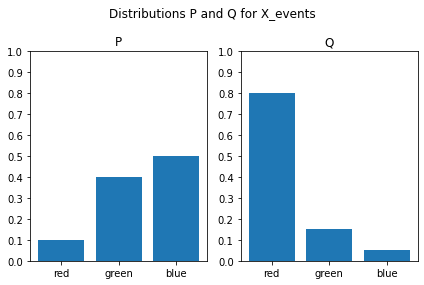

In [2]:
# plotting the two distributions

import numpy as np
import matplotlib.pyplot as plt

X_events = ["red", "green", "blue"]  # random variable's events
P = np.array([0.10, 0.40, 0.50])
Q = np.array([0.80, 0.15, 0.05])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Distributions P and Q for X_events')

ax1.set_title("P")
ax1.bar(X_events, P)
ax1.set_yticks([num / 10 for num in range(11)])

ax2.set_title("Q")
ax2.bar(X_events, Q)
ax2.set_yticks([num / 10 for num in range(11)])

fig.tight_layout()
plt.show()

In [3]:
# calculating the KL Divergence for P and Q

def kl_divergence(p, q):
    return sum(p[i] * log2(p[i] / q[i]) for i in range(len(p)) if p[i] > 0 and q[i] > 0)

print(f"If we approximate P with Q: KL(P || Q) = {round(kl_divergence(P, Q), 5)} bits")
print(f"If we approximate Q with P: KL(Q || P) = {round(kl_divergence(Q, P), 5)} bits")

If we approximate P with Q: KL(P || Q) = 1.92698 bits
If we approximate Q with P: KL(Q || P) = 2.02165 bits


KL(Q || P) is obviously higher, because of the case "If the prob for Q is high and prob for P is low, it's a larger difference than prob for P is high and prob for Q is low"

### Jenssen-Shannon (JS) Divergence

The normalized and symmetrical form of KL Divergence.

`JS(P || Q) = 0.5 * KL(P || (P + Q) / 2) + 0.5 * KL(Q || (P + Q) / 2)`

When the base-2 log is used, it gives a divergence score between 0 (identical) and 1 (totally different).

The square-root of the JS score is the JS distance.

**Applying JS Divergence to the above example:**

In [4]:
def js_divergence(p, q):
    m = (p + q) / 2
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

print(f"JS divergence: JS(P || Q) = JS(Q || P) = {round(js_divergence(P, Q), 5)} bits")
print(f"JS distance: {round(js_divergence(P, Q) ** 0.5, 5)}")

JS divergence: JS(P || Q) = JS(Q || P) = 0.4202 bits
JS distance: 0.64823


### Calculating MI with KL Divergence

We can calculate MI as the KL Divergence (Relative entropy) of the joint distribution and the product of independent dists. If the KL score is zero, the two dists are totally independent.

`I(X; Y) = KL(P(x, y) || P(x) * P(y)) = sum(P(x, y) * log2(P(x, y) / (P(x) * P(y)) for x € X, y € Y)`

This yields the same result with the Entropy-related approach.  
`I(X; Y) = -sum(P(x, y) * log2(P(x) * P(y) / P(x, y))`  
`I(X; Y) = H(P(x) * P(y)) - H(P(x, y))`  
`I(X; Y) = H(P(x)) + H(P(y)) - H(P(x, y))`

---

## An empirical example combining everything upto now

Story: We have the probabilities of blood type + skin cancer risk. Find the Mutual Information between the two.

X: Blood type, Y: Skin cancer risk

| Skin Cancer Risk | A | B | AB | O |
| ----------- | - | - | -- | - |
| Very Low | 1/8 | 1/16 | 1/32 | 1/32 |
| Low | 1/16 | 1/8 | 1/32 | 1/32 |
| Medium | 1/16 | 1/16 | 1/16 | 1/16 |
| High | 1/4 | 0 | 0 | 0 |

Marginal Probabilities:

| Blood Type | Probability |
| ---------- | ----------- |
| A | 1/2 |
| B| 1/4 |
| AB | 1/8 |
| O | 1/8 |

| Skin Cancer Risk | Probability |
| ---------- | ----------- |
| Very Low | 1/4 |
| Low | 1/4 |
| Medium | 1/4 |
| High | 1/4 |

Let's find H(X), H(Y), H(X | Y), H(Y | X), H(X, Y)

In [5]:
X = {"A": 1 / 2, "B": 1 / 4, "AB": 1 / 8, "O": 1 / 8}
Y = {"Very Low": 1 / 4, "Low": 1 / 4, "Medium": 1 / 4, "High": 1 / 4}

XY = np.array([
    1 / 8, 1 / 16, 1 / 32, 1 / 32,
    1 / 16, 1 / 8, 1 / 32, 1 / 32,
    1 / 16, 1 / 16, 1 / 16, 1 / 16,
    1 / 4, 0, 0, 0
])

X_product_Y = np.array([x * y for x in X.values() for y in Y.values()])


def entropy(probs: list):
    return -sum(p * log2(p) for p in probs if p > 0)

print(f"H(X) = {round(entropy(X.values()), 5)} bits")
print(f"H(Y) = {round(entropy(Y.values()), 5)} bits")
print(f"H(X, Y) = {round(entropy(XY), 5)} bits")
print(f"H(X | Y) = {round(entropy(XY) - entropy(Y.values()), 5)} bits")
print(f"H(Y | X) = {round(entropy(XY) - entropy(X.values()), 5)} bits")
print(f"I(X; Y) = {round(entropy(X.values()) + entropy(Y.values()) - entropy(XY), 5)} bits")

H(X) = 1.75 bits
H(Y) = 2.0 bits
H(X, Y) = 3.375 bits
H(X | Y) = 1.375 bits
H(Y | X) = 1.625 bits
I(X; Y) = 0.375 bits


This is in compliance with the Venn diagram above as well.